In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
np.random.seed(7)

Using TensorFlow backend.
/home/kierannp/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kierannp/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kierannp/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/kierannp/.local/lib/python3.6/site-packages/tensorflo

There are 62 days on record
There are 62 days on record


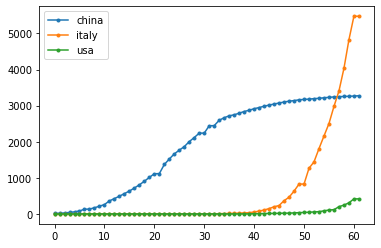

In [68]:
df = pd.read_csv('/home/kierannp/CSE885Final/Data/archived_time_series/time_series_19-covid-Deaths_archived_0325.csv')

countries=df[df.columns[1]]
columns=df.columns

def get_country_total(country):
    all_pop = []
    for col in country.columns[4:]:
        all_pop.append(country[col].sum())
    return all_pop

china = df[countries=='China']
usa = df[df[columns[1]]==np.unique(df[columns[1]])[172]]
hubei=china[china[china.columns[0]]=='Hubei']
italy = df[countries=='Italy']
china = df[countries=='China']

print("There are {} days on record".format(len(china.columns)-4))
print("There are {} days on record".format(len(italy.columns)-4))

hubei_pop = np.array(np.array(hubei)[0,4:],dtype=float)
italy_pop = np.array(italy)[0,4:].astype(np.float64)
usa_pop = np.array(usa)
plt.plot(np.arange(0,62,1),get_country_total(china),'.-',label='china')
plt.plot(np.arange(0,62,1),get_country_total(italy),'.-',label='italy')
plt.plot(np.arange(0,62,1),get_country_total(usa),'.-',label='usa')
# plt.yscale('log')
# plt.xscale('log')
plt.legend()

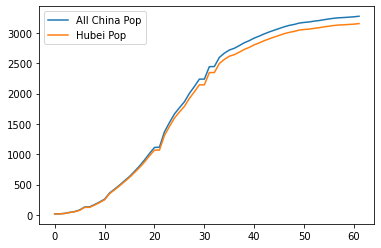

In [55]:
# np.unique(usa[columns[0]])

all_china=get_country_total(china)
plt.plot(range(len(all_china)),all_china,label='All China Pop')
plt.plot(range(len(hubei_pop)),hubei_pop,label='Hubei Pop')
plt.legend()

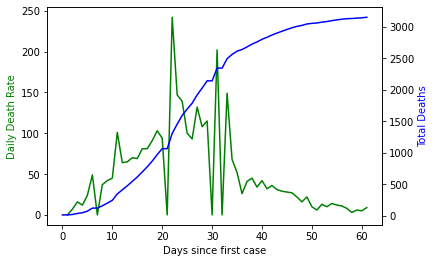

In [10]:
i0=hubei_pop[0]
diff=[]
for i in hubei_pop[1:]:
    diff.append(i-i0)
    i0=i
    
days=np.arange(0,len(hubei_pop),1)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(np.arange(1,len(diff)+1,1), diff, 'g-')
ax2.plot(days, hubei_pop, 'b-')

ax1.set_xlabel('Days since first case')
ax1.set_ylabel('Daily Death Rate', color='g')
ax2.set_ylabel('Total Deaths', color='b')

plt.show()

In [63]:
hubei = hubei_pop.reshape((62,1))
data = pd.DataFrame( { 'hubei deaths':hubei.reshape((62,)) } )
dataset = data.values
dataset = dataset.astype('int32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

41 21
Epoch 1/50
 - 0s - loss: 0.2317
Epoch 2/50
 - 0s - loss: 0.1889
Epoch 3/50
 - 0s - loss: 0.1550
Epoch 4/50
 - 0s - loss: 0.1286
Epoch 5/50
 - 0s - loss: 0.1089
Epoch 6/50
 - 0s - loss: 0.0933
Epoch 7/50
 - 0s - loss: 0.0820
Epoch 8/50
 - 0s - loss: 0.0742
Epoch 9/50
 - 0s - loss: 0.0668
Epoch 10/50
 - 0s - loss: 0.0616
Epoch 11/50
 - 0s - loss: 0.0574
Epoch 12/50
 - 0s - loss: 0.0537
Epoch 13/50
 - 0s - loss: 0.0498
Epoch 14/50
 - 0s - loss: 0.0463
Epoch 15/50
 - 0s - loss: 0.0436
Epoch 16/50
 - 0s - loss: 0.0399
Epoch 17/50
 - 0s - loss: 0.0371
Epoch 18/50
 - 0s - loss: 0.0337
Epoch 19/50
 - 0s - loss: 0.0307
Epoch 20/50
 - 0s - loss: 0.0277
Epoch 21/50
 - 0s - loss: 0.0247
Epoch 22/50
 - 0s - loss: 0.0221
Epoch 23/50
 - 0s - loss: 0.0195
Epoch 24/50
 - 0s - loss: 0.0173
Epoch 25/50
 - 0s - loss: 0.0148
Epoch 26/50
 - 0s - loss: 0.0127
Epoch 27/50
 - 0s - loss: 0.0109
Epoch 28/50
 - 0s - loss: 0.0094
Epoch 29/50
 - 0s - loss: 0.0078
Epoch 30/50
 - 0s - loss: 0.0062
Epoch 31/50
 

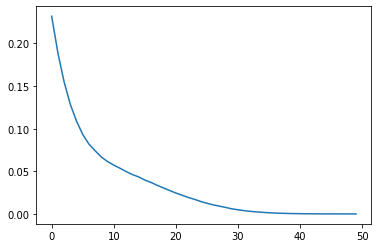

In [64]:
plt.plot(range(0,len(model.history.history['loss'])),model.history.history['loss'])

In [65]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 49.56 RMSE
Test Score: 38.61 RMSE


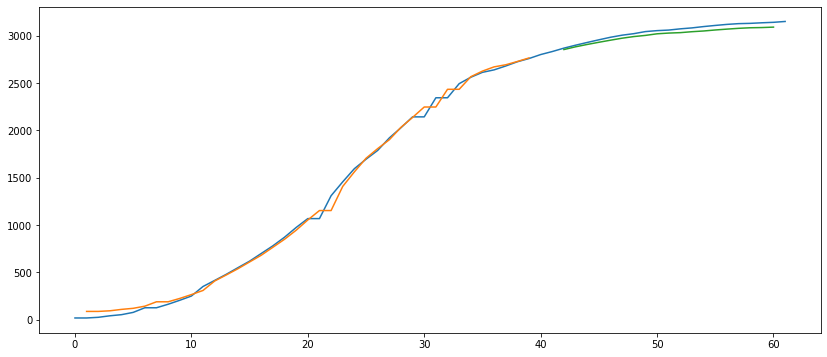

In [66]:
plt.figure(figsize=(14,6))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [15]:
plt.plot(testX.reshape((19,)),testY,label='data')
plt.plot(np.linspace(.7,.95,100),np.linspace(.7,.95,100),'r',label='f(x)=x')
plt.plot(testX.reshape((19,)),testY,label='data')
plt.plot(np.linspace(,.95,100),np.linspace(.7,.95,100),'r',label='f(x)=x')
plt.legend()

SyntaxError: invalid syntax (<ipython-input-15-f353db961847>, line 4)

In [8]:
model = Sequential()
model.add(LSTM(5,
          input_shape=(len(days), 1),
          batch_size=batch_size,
          stateful=stateful))
model.add(Dense(512))
model.compile(loss='mse', optimizer='adam')






# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62])

In [61]:
df2 = pd.read_csv('/home/kierannp/CSE885Final/Data/archived_time_series/time_series_2019-ncov-Deaths.csv')
df2[df2.columns[4:]]

,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,1/25/20 12:00,1/25/20 22:00,1/26/20 11:00,1/26/20 23:00,...,2/9/20 23:20,2/10/20 10:30,2/10/20 19:30,2/11/20 10:50,2/11/20 20:44,2/12/20 10:20,2/12/20 22:00,2/13/20 10:00,2/13/20 21:15,2/14/20 11:23
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,3.0,4.0,4.0,4.0,5.0,5.0,6,6
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3,3
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,4,5
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0


In [106]:
df2[df2[df2.columns[1]=='US']]

KeyError: False

In [107]:
df2[df2.columns[1]=='US']

KeyError: False